In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 数据
# X=[0.01,1.01,2.02,3.98]
# Y=[-5,-0.5,4,13]



In [2]:
features=[0.01,1.01,2.02,3.98]
labels=[-5,-0.5,4,13]
# a=0
# b=0

In [50]:
def plot_feature_label(features,labels):
    plt.scatter(features, labels, c='b')
    plt.show()

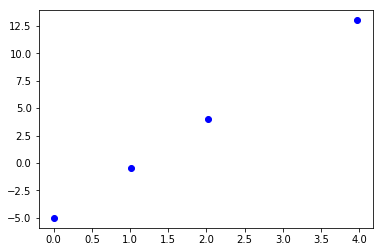

In [51]:
plot_feature_label(features,labels)

# 假设模型 y=ax+b
# 需要确定的参数是a,b (4.5,-5)
# loss_fun: $1/2\sum_{i=1}^n (ax_i+b-y_i)^2$

In [5]:
def loss_fun(a,b,features,labels):
    loss_values=[0.5*np.square(a*features[i]+b-labels[i]) for i in range(len(labels)) ]
    return np.sum(loss_values)

In [6]:
def dfun(a,b,features,labels):
# y=ax+b
    x1_list=[(a*features[i]+b-labels[i])*features[i] for i in range(len(features))]
    x2_list=[(a*features[i]+b-labels[i]) for i in range(len(features))]
    x1=np.sum(x1_list)
    x2=np.sum(x2_list)
    return x1,x2

In [39]:
# Gradient Descent
def GD(x_start, epochs, lr, features, labels):
    """
    梯度下降法。给定起始点与目标函数的一阶导函数，求在epochs次迭代中x的更新值
    :param x_start: x的起始点
    :param epochs: 迭代周期
    :param lr: 学习率
    """
    a, b = x_start[0],x_start[1]
    x_loss=[]
    tra_a,tra_b=[],[]
    tra_a.append(a)
    tra_b.append(b)
    x_loss.append(loss_fun(a,b,features,labels))
    for i in range(epochs):
        x1,x2 = dfun(a,b,features,labels)
        # 表示要改变的幅度
        a, b = a - lr *x1, b - lr *x2
        tra_a.append(a)
        tra_b.append(b)
        print(a,b,x1,x2)
        x_loss.append(loss_fun(a,b,features,labels))
    return x_loss,a,b,tra_a,tra_b

In [52]:
x_loss,a,b,tra_a,tra_b=GD([3,1], 100, 0.06, features, labels)

2.36532 0.1864 10.578 13.56
2.8707783528 -0.164608784 -8.42430588 5.8501464
2.88899340346 -0.644274518039 -0.303584177695 7.99442890066
3.08635717875 -1.01649265525 -3.28939625474 6.20363562014
3.19251954433 -1.38250806168 -1.76937275971 6.10025677381
3.31945883324 -1.70539535895 -2.11565481517 5.38145495448
3.42290411282 -2.00425653336 -1.72408799293 4.98101957356
3.52225486308 -2.27496217767 -1.65584583772 4.51176073853
3.61079658705 -2.52254500336 -1.47569539953 4.12638042813
3.6923710627 -2.74800172502 -1.35957459416 3.75761202766
3.76641284384 -2.95370800262 -1.23402968563 3.42843796008
3.83406757277 -3.14123117182 -1.12757881561 3.12538615325
3.89570159986 -3.31224495223 -1.0272337847 2.8502296736
3.95192594158 -3.46817567756 -0.937072362099 2.59884542205
4.00318466841 -3.61036472154 -0.854312113785 2.36981739968
4.04992888065 -3.7400185707 -0.779070204042 2.16089748608
4.09255106125 -3.85824415826 -0.710369676608 1.97042645936
4.13141679429 -3.96604806728 -0.647762217421 1.79673

In [53]:
a,b,min(x_loss)

(4.5332513959800806, -5.0806443087707525, 0.0085741933248316554)

In [54]:
def plot_learning(tra_a,tra_b):
    plt.scatter(4.5,-5, labels, c='r')
    plt.scatter(tra_a, tra_b, c='b')
    plt.plot(tra_a, tra_b, c='b')
    plt.show()

plot_learning(tra_a,tra_b)

plot_learning(tra_a,tra_b)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


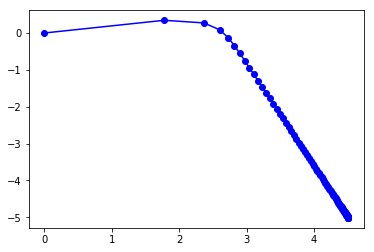

In [59]:
plot_learning(tra_a,tra_b)

In [58]:
x_loss,a,b,tra_a,tra_b=GD([0,0], 100, 0.03, features, labels)

1.77795 0.345 -59.265 -11.5
2.3662814715 0.27416373 -19.61104905 2.361209
2.59992358112 0.0879252045021 -7.78807032072 6.20795084993
2.72600654169 -0.125169726222 -4.20276535213 7.10316435748
2.81775819634 -0.339246336755 -3.05838848865 7.13588701774
2.89695324318 -0.546956652494 -2.63983489436 6.92367719132
2.97013937823 -0.746420207208 -2.43953783517 6.64878515712
3.03935481228 -0.937361135398 -2.30718113507 6.36469760635
3.10529919368 -1.11996592262 -2.19814604648 6.08682624063
3.16827190454 -1.29454602209 -2.09909036198 5.81933664915
3.2284498382 -1.46143856254 -2.00593112218 5.56308468148
3.28596975762 -1.62097747096 -1.91733064721 5.31796361403
3.34095283217 -1.7734854054 -1.83276915183 5.08359781465
3.39351206079 -1.9192718232 -1.75197428734 4.85954726027
3.44375462481 -2.05863284442 -1.67475213382 4.64536737395
3.4917827339 -2.19185162708 -1.60093696974 4.44062608846
3.53769401964 -2.31919887559 -1.53037619147 4.24490828367
3.58158178888 -2.44093337105 -1.46292564124 4.05781651